In [66]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import math

# Load data

### Bitcoin data

In [4]:
btc_Ticker = yf.Ticker("BTC-USD")
btc_data = btc_Ticker.history(period="max")

## Fibonacci function

In [20]:
def fibonacci_retracement(high,low,trend):
    retracement_levels = {0:0,0.236:0,0.382:0,0.50:0,0.618:0,0.764:0,1:0}
    fibonacci_extension = {0:0,0.382:0,0.618:0,1.000:0,1.382:0,1.618:0,2.000:0}
    if(trend == "uptrend"):
        for percentage in retracement_levels.keys():
            retracement_levels[percentage] = high - ((high-low) * percentage)
        for percentage in fibonacci_extension.keys():
            fibonacci_extension[percentage] = high + ((high-low) * percentage)
    elif(trend == "downtrend"):
        for percentage in retracement_levels.keys():
            retracement_levels[percentage] = low + ((high-low) * percentage)
        for percentage in fibonacci_extension.keys():
            fibonacci_extension[percentage] = low - ((high-low) * percentage)
    else:
        #throw error incorrect trend
        return
    return retracement_levels,fibonacci_extension

In [22]:
min_btc = btc_data["Close"].min()
max_btc = btc_data["Close"].max()

In [30]:
fib_res = fibonacci_retracement(min_btc,max_btc,"uptrend")

## Plot on bitcoin data

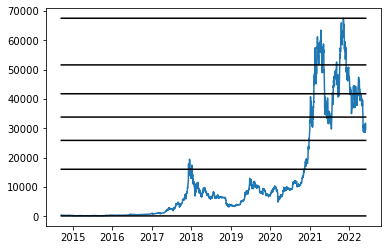

In [62]:
plt.plot(btc_data["Close"])

plt.plot(btc_data.reset_index()["Date"], np.ones(len(btc_data.reset_index()["Date"])) * fib_res[0][0], '-0', label="0.236")

plt.plot(btc_data.reset_index()["Date"], np.ones(len(btc_data.reset_index()["Date"])) * fib_res[0][0.236], '-0', label="0.236")

plt.plot(btc_data.reset_index()["Date"], np.ones(len(btc_data.reset_index()["Date"])) * fib_res[0][0.382], '-0')

plt.plot(btc_data.reset_index()["Date"], np.ones(len(btc_data.reset_index()["Date"])) * fib_res[0][0.5], '-0')

plt.plot(btc_data.reset_index()["Date"], np.ones(len(btc_data.reset_index()["Date"])) * fib_res[0][0.618], '-0')

plt.plot(btc_data.reset_index()["Date"], np.ones(len(btc_data.reset_index()["Date"])) * fib_res[0][0.764], '-0')

plt.plot(btc_data.reset_index()["Date"], np.ones(len(btc_data.reset_index()["Date"])) * fib_res[0][1], '-0')


In [184]:

def backtest(amount, buy, sell, data, bought = 1):
    coins = float(amount / buy)
    last_price = 0.0
    for price_index in range(len(data)):
        if(bought == 1):
            if(data[price_index] > sell):
                bought = 0.0
                amount = coins * sell
                coins = 0.0
                print(max(coins * last_price,amount))
                
        else:
            if(data[price_index] < buy):
                bought = 1
                coins = float(amount/buy)
                amount = 0.0
                print(max(coins * last_price,amount))
        last_price = data[price_index]
        
    return  max(coins * last_price,amount)/1000 * 100

In [198]:
backtest(1000.0,fib_res[0][0.764],fib_res[0][1],(btc_data["Close"].to_numpy()),1)

100.0